# Analyzing the Impact of Media Type and Hashtags on Instagram Reach using Linear Regression

https://www.distilagency.com/hubfs/SDS_Blog_Insta_Insights.gif

In [7]:
import pandas as pd 
import numpy as np

In [8]:
df = pd.read_excel("Instagram_Analytics.xlsx")

# Exploratory Data Analysis

In [9]:
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.955,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.955,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.955,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.955,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.955,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [10]:
df.dtypes

post_id                     object
upload_date         datetime64[ns]
media_type                  object
likes                        int64
comments                     int64
shares                       int64
saves                        int64
reach                        int64
impressions                  int64
caption_length               int64
hashtags_count               int64
followers_gained             int64
traffic_source              object
engagement_rate            float64
content_category            object
dtype: object

In [11]:
df.describe()

,upload_date,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,2025-05-19 23:56:53.978034432,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
min,2024-11-19 09:25:22.955000,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,2025-02-18 09:25:22.955000064,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,2025-05-19 09:25:22.955000064,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,2025-08-19 09:25:22.955000064,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,2025-11-19 09:25:22.955000,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000
std,NaN,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210


In [12]:
df.shape

(29999, 15)

In [13]:
#df.info()

In [14]:
df.columns

Index(['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares',
       'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category'],
      dtype='object')

# Data Preprocessing

## Checking for null values

In [15]:
df.isnull().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

## Checking for duplicate rows

In [16]:
df.duplicated().sum()

np.int64(0)

The above row defines that the dataset has no null or empty values and also no duplicate rows which means the dataset is clean and ready for further steps.

## Data visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# df['traffic_source'].nunique()

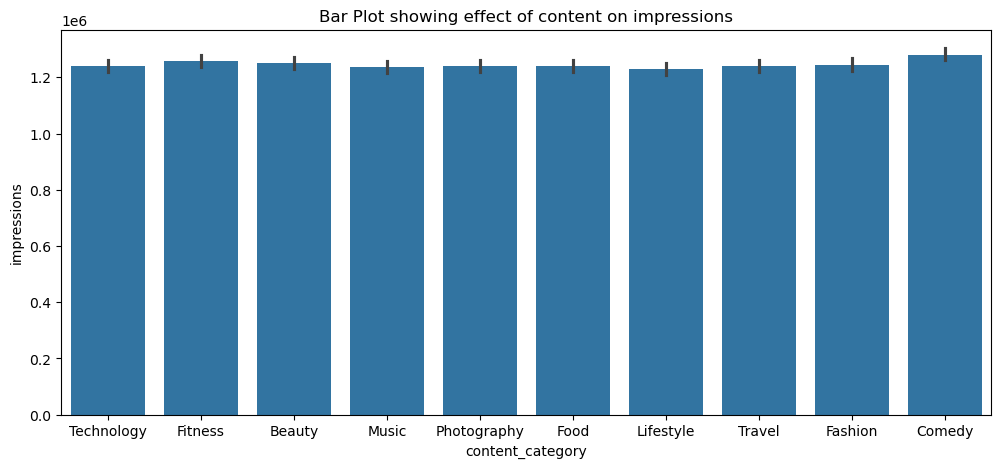

In [19]:
# 2. Bar Plot
# -------------------------
plt.figure(figsize=(12,5))
sns.barplot(x='content_category', y='impressions', data=df)
plt.title('Bar Plot showing effect of content on impressions')
plt.show()

The above bar plot identifes that comedy was the first category which gets highest post impressions while the second highest was fashion

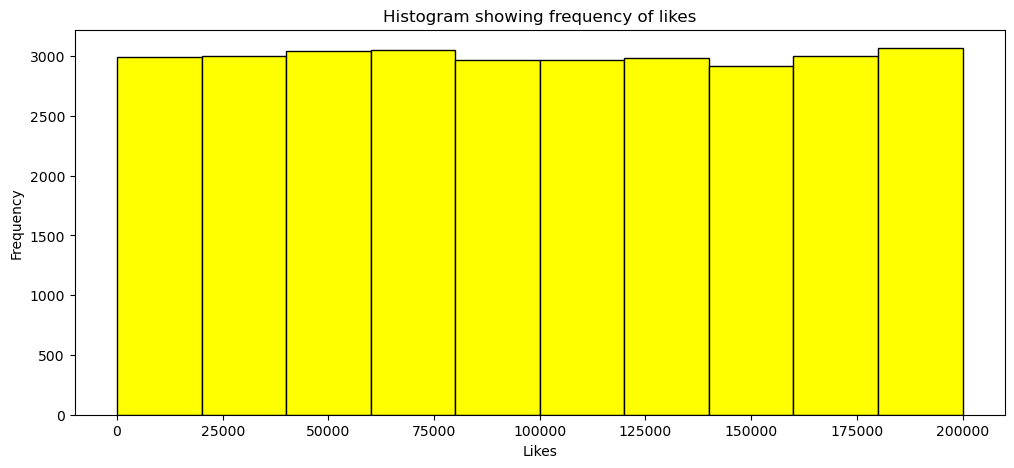

In [24]:
# 3. Histogram
# -------------------------
plt.figure(figsize=(12,5))
plt.hist(df['likes'], bins=10, color='yellow', edgecolor='black')
plt.title('Histogram showing frequency of likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

In [23]:
# plt.figure(figsize=(8,5))
# plt.plot(df['content_category'], df['likes'], 'o', color='pink')  # 'o' makes dots
# plt.title('Dot Plot')
# plt.xlabel('Category')
# plt.ylabel('Values')
# plt.show()


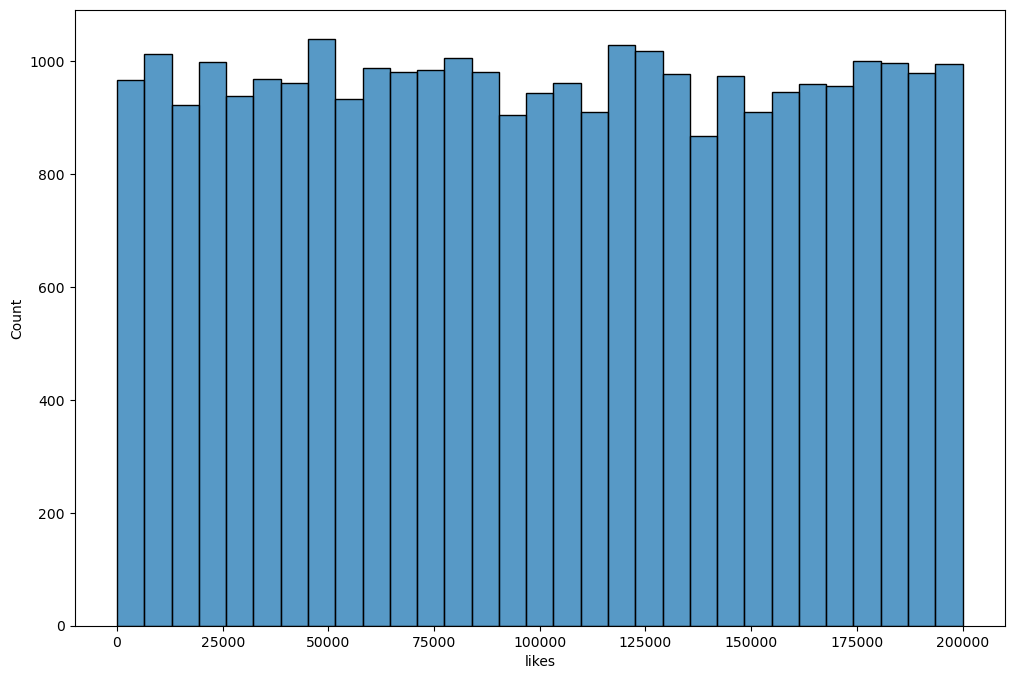

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df['likes'],kde=False)
plt.show()

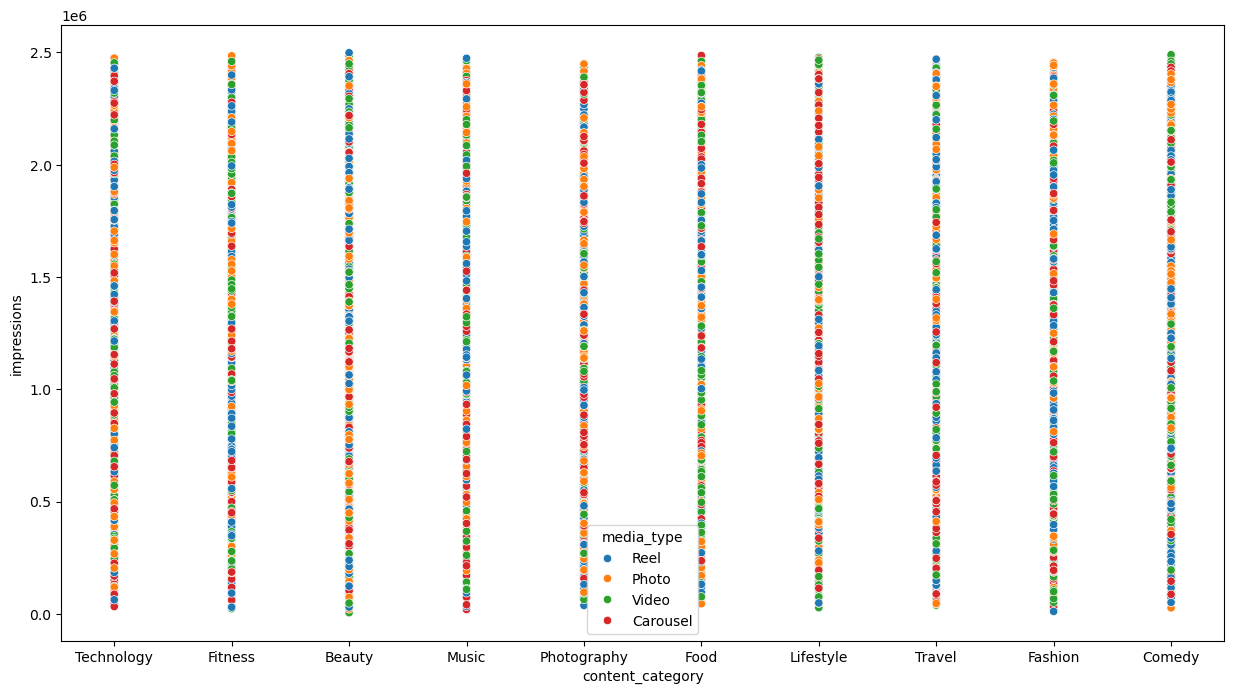

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="content_category", y="impressions", hue="media_type", data=df)
plt.show()

Impressions depend on both content category and media type, but media format has a stronger impact.

Short-form and motion content (Reels/Videos) consistently achieve higher reach across categories.

Category alone does not guarantee reach — execution matters.

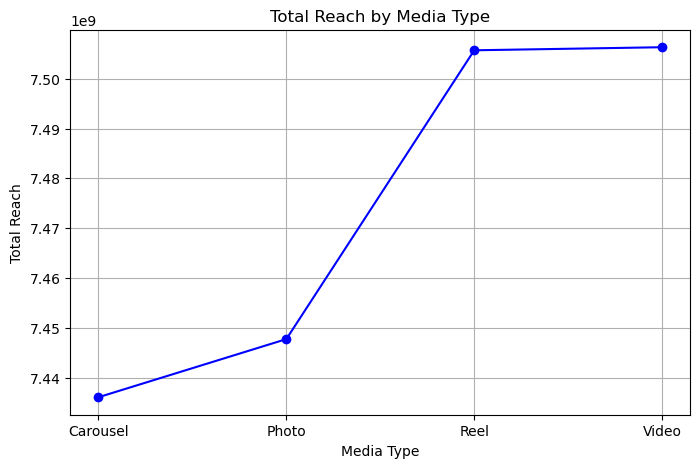

In [26]:
# 1. Aggregate sum of reach by media type
reach_sum = df.groupby('media_type')['reach'].sum().reset_index()

# 2. Sort by media type if needed (optional)
reach_sum = reach_sum.sort_values('media_type')

# 3. Plot line chart
plt.figure(figsize=(8,5))
plt.plot(reach_sum['media_type'], reach_sum['reach'], marker='o', linestyle='-', color='blue')
plt.title('Total Reach by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Total Reach')
plt.grid(True)
plt.show()

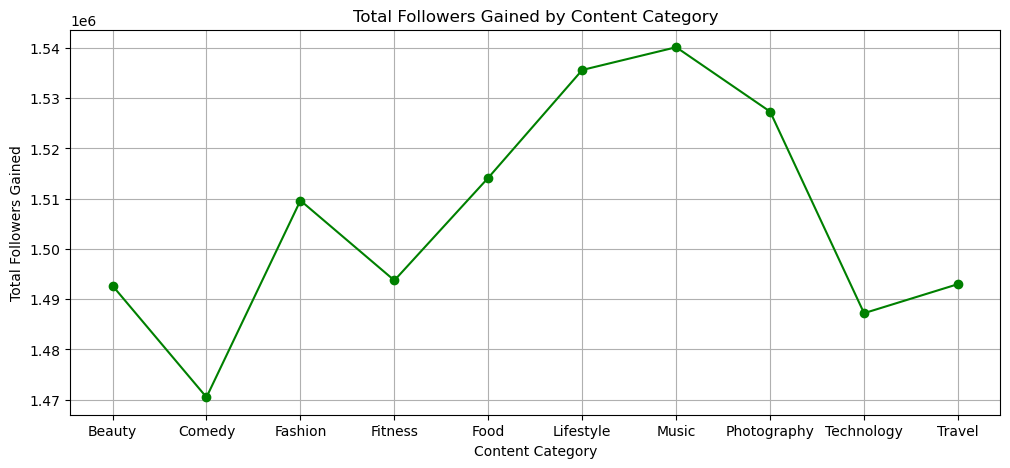

In [27]:
# 1. Aggregate sum of followers by content category
followers_sum = df.groupby('content_category')['followers_gained'].sum().reset_index()

# 2. Sort by content category if needed (optional)
followers_sum = followers_sum.sort_values('content_category')

# 3. Plot line chart
plt.figure(figsize=(12,5))
plt.plot(followers_sum['content_category'], followers_sum['followers_gained'], marker='o', linestyle='-', color='green')
plt.title('Total Followers Gained by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Total Followers Gained')
plt.grid(True)
plt.show()

C:\Users\freel\AppData\Local\Temp\ipykernel_12472\2760177681.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_type', y='engagement_rate', data=engagement_sum, palette='viridis')


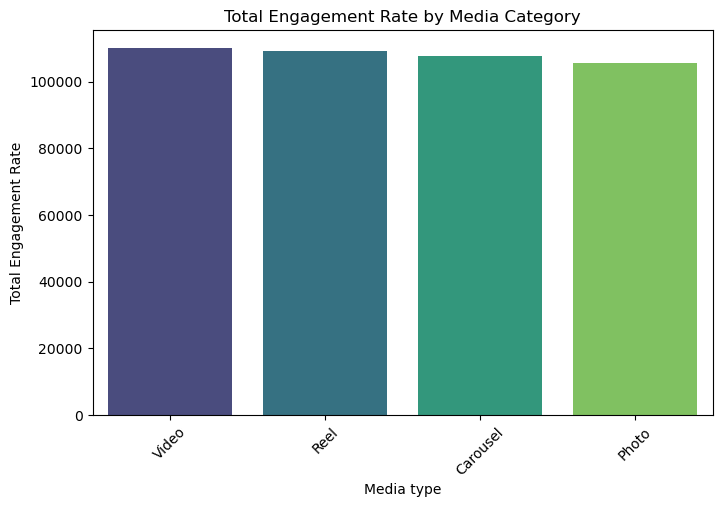

In [28]:

# 1. Aggregate sum of engagement rate by media category
engagement_sum = df.groupby('media_type')['engagement_rate'].sum().reset_index()

# 2. Sort by engagement rate if needed (optional)
engagement_sum = engagement_sum.sort_values('engagement_rate', ascending=False)

# 3. Plot bar chart using Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x='media_type', y='engagement_rate', data=engagement_sum, palette='viridis')
plt.title('Total Engagement Rate by Media Category')
plt.xlabel('Media type')
plt.ylabel('Total Engagement Rate')
plt.xticks(rotation=45)  # Rotate x labels if long
plt.show()

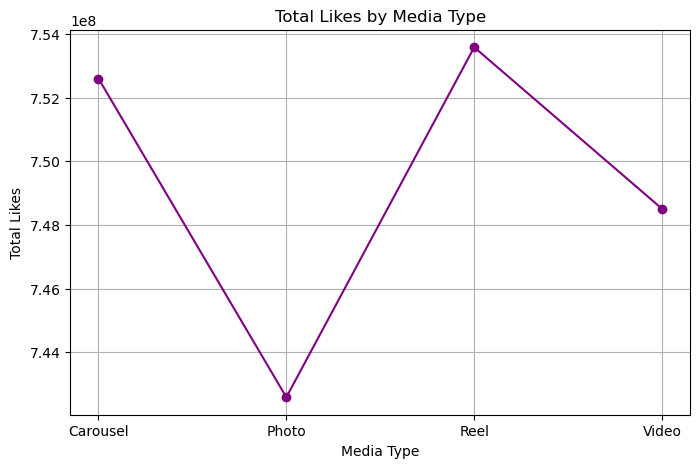

In [29]:
# 1. Aggregate sum of likes by media type
likes_sum = df.groupby('media_type')['likes'].sum().reset_index()

# 2. Sort by media type if needed (optional)
likes_sum = likes_sum.sort_values('media_type')

# 3. Plot line chart
plt.figure(figsize=(8,5))
plt.plot(likes_sum['media_type'], likes_sum['likes'], marker='o', linestyle='-', color='purple')
plt.title('Total Likes by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()

C:\Users\freel\AppData\Local\Temp\ipykernel_12472\744934312.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_source', y='impressions', data=impressions_sum, palette='coolwarm')


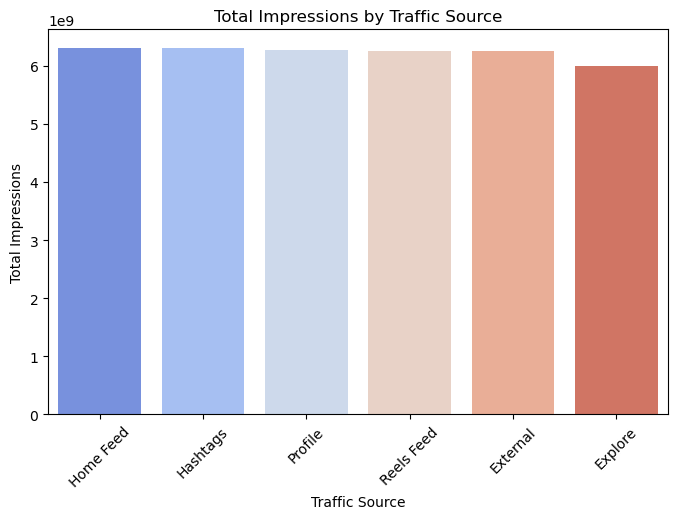

In [30]:
# 1. Aggregate sum of impressions by traffic source
impressions_sum = df.groupby('traffic_source')['impressions'].sum().reset_index()

# 2. Sort by impressions if needed (optional)
impressions_sum = impressions_sum.sort_values('impressions', ascending=False)

# 3. Plot column chart using Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x='traffic_source', y='impressions', data=impressions_sum, palette='coolwarm')
plt.title('Total Impressions by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)  # Rotate x labels if long
plt.show()

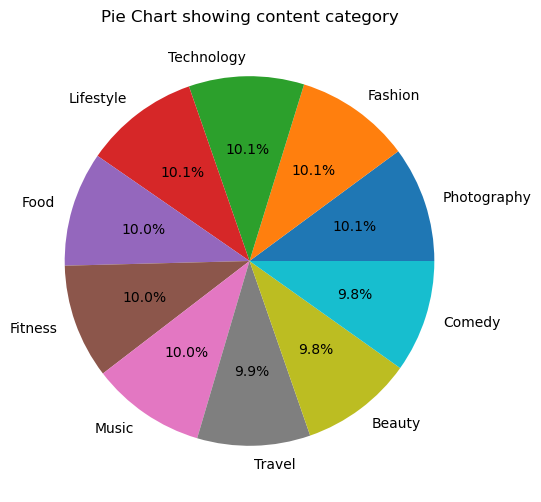

In [26]:
plt.figure(figsize=(6,6))
plt.pie(df['content_category'].value_counts(), labels=df['content_category'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart showing content category')
plt.show()

In [36]:
y = df['content_category'].nunique()
print(y)
df['media_type'].nunique()

10


4

## Libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

## Features & Target

In [39]:
X = df[['media_type', 'hashtags_count']]
y = df['reach']

## Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Encoding and Scaling

In [44]:
categorical_features = ['media_type']
numeric_features = ['hashtags_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

## Pipeline

In [45]:
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

## Train Model

In [46]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['media_type']),
                                                 ('num', StandardScaler(),
                                                  ['hashtags_count'])])),
                ('regression', LinearRegression())])

## Model Evaluation

In [52]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: -5.443446830200038e-05
MAE: 500354.2671180083


## Predicting reach 

In [51]:
# user input
user_media_type = input("Enter media type (image/video/reel/carousel): ")
user_hashtag_count = int(input("Enter hashtag count: "))

# create dataframe
user_input = pd.DataFrame({
    'media_type': [user_media_type],
    'hashtags_count': [user_hashtag_count]
})

# prediction
predicted_reach = model.predict(user_input)

print(f"Predicted Reach: {int(predicted_reach[0])}")

Enter media type (image/video/reel/carousel):  reel
Enter hashtag count:  3


Predicted Reach: 991161


C:\Users\freel\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Conclusion

Prioritize Reels and Videos in high-interest categories (Comedy, Food, Travel, Fashion).

Use Carousels for storytelling or educational content.

Improve Photos with stronger hooks, captions, and timing.